<a href="https://colab.research.google.com/github/yeesem/Deep_Learning/blob/main/Cat_Classification_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

import copy
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [3]:
def initialize_parameters(n_x, n_h, n_y):

    np.random.seed(1)

    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [4]:
def initialize_parameters_deep(layer_dims):

    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):

        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

    return parameters

In [5]:
# Implement the linear part of a layer's forward propagation.

#     Arguments:
#     A -- activations from previous layer (or input data): (size of previous layer, number of examples)
#     W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
#     b -- bias vector, numpy array of shape (size of the current layer, 1)
def linear_forward(A, W, b):

    Z = np.dot(W,A) + b

    # YOUR CODE ENDS HERE
    cache = (A, W, b)

    return Z, cache

In [6]:
def relu(Z):
  A = np.maximum(0,Z)
  activation_cache = (Z,)
  return A,activation_cache

In [7]:
def sigmoid(Z):
  A = 1 / (1 + np.exp(-Z))
  activation_cache = (Z,)
  return A,activation_cache

In [8]:
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A,activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)

    return A, cache

In [9]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL -- activation value from the output (last) layer
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """

    caches = []
    A = X

    #The "//" operator in Python is the floor division operator.
    #It performs division and rounds down to the nearest integer
    L = len(parameters) // 2  # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    # The for loop starts at 1 because layer 0 is the input
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], "relu")
        caches.append(cache)

    # Update A_prev for the final layer
    A_prev = A

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A_prev, parameters["W" + str(L)], parameters["b" + str(L)], "sigmoid")
    caches.append(cache)

    return AL, caches


In [10]:
def compute_cost(AL, Y):

    m = Y.shape[1]

    cost = -1/m * np.sum(Y*np.log(AL) + (1 - Y) * np.log(1 - AL))

    # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    cost = np.squeeze(cost)

    return cost

In [11]:
A = np.array([[1, 2], [3, 4]])

print('axis=1 and keepdims=True')
print(np.sum(A, axis=1, keepdims=True))
print('axis=1 and keepdims=False')
print(np.sum(A, axis=1, keepdims=False))
print('axis=0 and keepdims=True')
print(np.sum(A, axis=0, keepdims=True))
print('axis=0 and keepdims=False')
print(np.sum(A, axis=0, keepdims=False))

axis=1 and keepdims=True
[[3]
 [7]]
axis=1 and keepdims=False
[3 7]
axis=0 and keepdims=True
[[4 6]]
axis=0 and keepdims=False
[4 6]


In [36]:
def relu_backward(dA, activation_cache):

    Z = activation_cache

    #np.int64 -  is a NumPy expression that creates an array of the same shape as Z
    dZ = np.multiply(dA, np.int64(Z[0] > 0))
    # Element-wise multiplication with the ReLU derivative

    return dZ

In [35]:
def sigmoid_backward(dA, cache):

    Z = cache

    s = 1 / (1 + np.exp(-Z[0]))

    # The derivative of the sigmoid function
    dZ = dA * s * (1 - s)
    return dZ

In [14]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]


    dW = 1/m * np.dot(dZ,A_prev.T)
    db = 1/m * np.sum(dZ,axis = 1,keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    return dA_prev, dW, db

In [15]:
def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev,dW,db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev,dW,db = linear_backward(dZ,linear_cache)

    return dA_prev, dW, db

In [16]:
def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    dAL = -(np.divide(Y,AL) - np.divide(1-Y,1-AL))

    current_cache = caches[L-1]
    dA_prev_temp,dW_temp,db_temp = linear_activation_backward(dAL,current_cache,activation="sigmoid")
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp

    #if L = 4,print 2,1,0
    for l in reversed(range(L-1)):

        current_cache = caches[l]
        dA_prev_temp,dW_temp,db_temp = linear_activation_backward(grads["dA"+str(l+1)],current_cache,activation = "relu")
        grads["dA"+str(l)] = dA_prev_temp
        grads["dW"+str(l+1)] = dW_temp
        grads["db"+str(l+1)] = db_temp

    return grads

In [17]:
def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    params -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """
    parameters = copy.deepcopy(params)
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):

        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

    return parameters

In [18]:
L = 4
for l in reversed(range(L-1)):
  print(l)


2
1
0


# **Cat Classification**

In [25]:
def load_dataset():
    with h5py.File('train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    #Reshape the Y_Train and Y_Test from 1D Array to 2D array
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [26]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

y = 0. It's a non-cat picture.


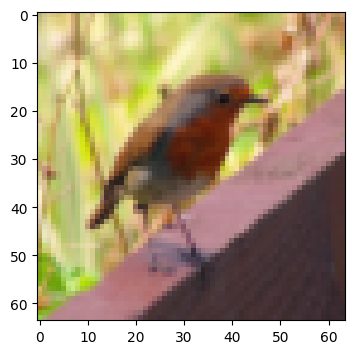

In [27]:
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [28]:
# Explore your dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [29]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


# **Two Layers Neuron Network**

In [30]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [33]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations

    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """

    np.random.seed(1)
    grads = {}
    costs = []                        # to keep track of the cost
    m = X.shape[1]                    # number of examples
    (n_x, n_h, n_y) = layers_dims

    parameters = initialize_parameters(n_x,n_h,n_y)

    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1,cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2,cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")

        # Compute cost
        cost = compute_cost(A2, Y)

        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1,dW2,db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0,dW1,db1 = linear_activation_backward(dA1, cache1, "relu")

        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [37]:
parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2, print_cost=False)

Cost after iteration 1: 0.6926114346158594


Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.433916315122575
Cost after iteration 800: 0.4007977536203886
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.2749137728213015
Cost after iteration 1300: 0.24681768210614846
Cost after iteration 1400: 0.19850735037466116
Cost after iteration 1500: 0.17448318112556646
Cost after iteration 1600: 0.17080762978096659
Cost after iteration 1700: 0.11306524562164712
Cost after iteration 1800: 0.09629426845937149
Cost after iteration 1900: 0.08342617959726864
Cost after iteration 2000: 0.07439078704319083
Cost after iteration 2100: 0.06630748132

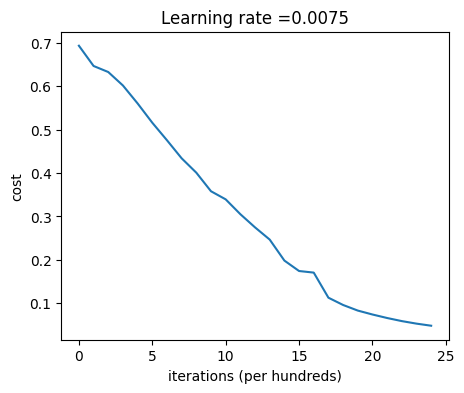

In [38]:
parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
plot_costs(costs, learning_rate)

In [ ]:
predictions_train = predict(train_x, train_y, parameters)

In [ ]:
predictions_test = predict(test_x, test_y, parameters)

# **L Layers Neuron Network**

In [49]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [50]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost

    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL,caches = L_model_forward(X, parameters)

        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

In [51]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 1, print_cost = False)

print("Cost after first iteration: " + str(costs[0]))

Cost after iteration 0: 0.6931477726958
Cost after first iteration: 0.6931477726958


In [52]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.6931477726958
Cost after iteration 100: 0.6780107728090446
Cost after iteration 200: 0.6675997530076283
Cost after iteration 300: 0.6604218729413204
Cost after iteration 400: 0.6554578158288099
Cost after iteration 500: 0.6520134603618388
Cost after iteration 600: 0.649615817609133
Cost after iteration 700: 0.6479417374612982
Cost after iteration 800: 0.6467696408278701
Cost after iteration 900: 0.6459469904244376
Cost after iteration 1000: 0.6453683565180596
Cost after iteration 1100: 0.6449605941011141
Cost after iteration 1200: 0.6446727774747648
Cost after iteration 1300: 0.6444693397903307
Cost after iteration 1400: 0.6443253714906714
Cost after iteration 1500: 0.6442233840298892
Cost after iteration 1600: 0.6441510728582549
Cost after iteration 1700: 0.6440997647032185
Cost after iteration 1800: 0.6440633362006798
Cost after iteration 1900: 0.6440374583192076
Cost after iteration 2000: 0.6440190669815907
Cost after iteration 2100: 0.6440059911782885
Cost

In [ ]:
pred_train = predict(train_x, train_y, parameters)

In [ ]:
pred_test = predict(test_x, test_y, parameters)

In [53]:
def print_mislabeled_images(classes, X, Y, predictions):
    """
    Print images that were mislabeled along with their true and predicted labels.

    Parameters:
    - classes: List of class names.
    - X: Input data, shape (input_size, m) where m is the number of examples.
    - Y: True labels, shape (1, m).
    - predictions: Predicted labels, shape (1, m).
    """
    # Convert predictions to binary values (0 or 1)
    binary_predictions = (predictions > 0.5).astype(int)

    mislabeled_indices = np.where(binary_predictions != Y)[1]

    # Choose a random subset of mislabeled images to display
    num_images_to_display = min(5, len(mislabeled_indices))
    selected_indices = np.random.choice(mislabeled_indices, num_images_to_display, replace=False)

    for index in selected_indices:
        plt.imshow(X[:, index].reshape((64, 64, 3)))
        plt.title(f"True label: {classes[int(Y[0, index])]} | Predicted: {classes[int(binary_predictions[0, index])]}")
        plt.show()

In [ ]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

In [ ]:
!pip install Pillow
from PIL import Image

In [ ]:
my_image = "/content/Screenshot 2023-01-04 094124.jpg" # change this to the name of your image file
my_label_y = [0] # the true class of your image (1 -> cat, 0 -> non-cat)

fname = my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = predict(image, my_label_y, parameters)


print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")